In [188]:
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image
from pathlib2 import Path
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
from skimage.morphology import convex_hull_image

In [9]:
original_image_dir = Path('original_images/')
modified_image_dir = Path('modified_images/')

original_image_paths = list(original_image_dir.glob('*.png'))
modified_image_paths = list(modified_image_dir.glob('*.png'))

print 'original {}, modified {}'.format(len(original_image_paths), 
                                        len(modified_image_paths))

original 1788, modified 1788


In [16]:
blah = cv2.imread(str(rotated_image_name))
blah.shape

(357, 500, 3)

In [22]:
# image statistics
def image_info(filepath):
    image = cv2.imread(str(filepath))
    height, width, channels = image.shape
    
    return {'filename':str(filepath), 
            'height': height, 
            'width': width,
            'channels': channels}


original_dimensions = pd.DataFrame([image_info(f) for f in original_image_paths])
modified_dimensions = pd.DataFrame([image_info(f) for f in modified_image_paths])

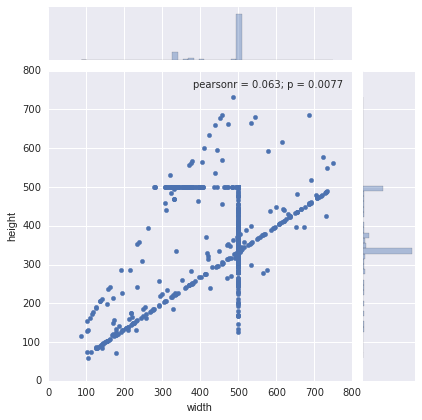

In [28]:
sns.jointplot(data=modified_dimensions, x='width', y='height')

In [40]:
# before we get into this, let's try a perceptual hash
import imagehash

original_hashes_a = {imagehash.average_hash(Image.open(str(f))): f for f in original_image_paths}
modified_hashes_a = {imagehash.average_hash(Image.open(str(f))): f for f in modified_image_paths}

original_hashes_p = {imagehash.phash(Image.open(str(f))): f for f in original_image_paths}
modified_hashes_p = {imagehash.phash(Image.open(str(f))): f for f in modified_image_paths}

original_hashes_d = {imagehash.dhash(Image.open(str(f))): f for f in original_image_paths}
modified_hashes_d = {imagehash.dhash(Image.open(str(f))): f for f in modified_image_paths}

original_hashes_w = {imagehash.whash(Image.open(str(f))): f for f in original_image_paths}
modified_hashes_w = {imagehash.whash(Image.open(str(f))): f for f in modified_image_paths}

In [43]:
# iterate through ohashes, trying to match
def match(ohash, mhash):
    unpaired = []
    for h, f in ohash.iteritems():
        if h not in mhash.keys():
            unpaired.append(f)

    print(len(unpaired))
    

print 'a'
match(original_hashes_a, modified_hashes_a)
print 'p'
match(original_hashes_p, modified_hashes_p)
print 'w'
match(original_hashes_w, modified_hashes_w)
print 'd'
match(original_hashes_d, modified_hashes_d)

a
1201
p
1229
w
1141
d
1275


Types of transforms

- blur
- rotate
    - all the rotations don't pad the boundary with anything, fit a minimal area rectangle to everything non-black should get them
- color transform (-> gray, -> weird)

preprocessing pipeline
- grayscale (undo color transforms)
- rectify (undo rotations pt 1)
- optionally, rotate right to make landscape
- center crop (by percentage) (undo rotations pt 2)
- blur and downsample to minimal size (32 x 32)

calculate rmse pairwise across dataset

[[ 71 205]
 [ 71 206]
 [ 71 207]
 ..., 
 [427 435]
 [427 436]
 [427 437]]
((248.99996948242188, 320.4999694824219), (355.99993896484375, 498.99993896484375), -0.0)


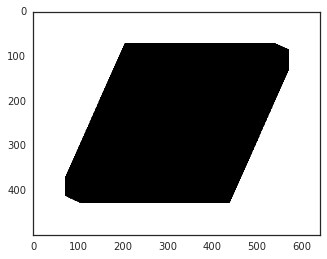

In [205]:
# testing preprocessing pipeline
rotated_image_name = Path('/home/chris/project    box = np.int0(box)
#     blah2 = np.zeros_like(image)
#     cv2.drawContours(blah2, [box], 0, (0, 0, 255), 2)s/image_match/modified_images/fe6c006d-655b-4f69-b7d8-c8063df3d2d3.png')
gray_image_name = Path('/home/chris/projects/image_match/modified_images/fe984cbe-8906-46eb-b4d2-c6000836fbb2.png')

def process(image_path):
    image = cv2.imread(str(image_path))
    
    pad_size = abs(image.shape[0] - image.shape[1]) // 2
    
    image = np.pad(image, ((pad_size, pad_size),
                             (pad_size, pad_size),
                           (0, 0)),
                    mode='constant',
                    constant_values=0)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     ret, thresh = cv2.threshold(gray, 170, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
    
    
#     edges = cv2.Canny(gray, 100, 200)
    
    hull = convex_hull_image(gray)
    
#     plt.imshow(hull)

# #     print hull
    
#     contours, hierarchy = cv2.findContours(edges, cv2.RETR_LIST, 
#                                            method=cv2.CHAIN_APPROX_SIMPLE)
    
    
    
#     blah = np.zeros_like(image)
#     cv2.drawContours(blah, contours, -1, (0, 255, 0), 3)
    
#     print len(contours)
    
#     plt.imshow(blah)

    hull_points = np.argwhere(hull)
    
    print hull_points
    
    box = cv2.minAreaRect(hull_points)
    
    
#     box = np.int0(box)
#     blah2 = np.zeros_like(image)
#     cv2.drawContours(blah2, [box], 0, (0, 0, 255), 2)
    
    plt.imshow(hull)
    
    print box
    
with sns.axes_style('white'):
    process(rotated_image_name)